In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/MyDrive/TextMining_WordEmbedding

/content/drive/MyDrive/TextMining_WordEmbedding


# Tokenizer, Cleansing

In [ ]:
#konlpy 설치 (mecab 제외). 3~40초 정도 소요
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [4]:
# java 경로 설정
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
# mecab 설치 (1분 30초 정도 걸림)
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [6]:
# huggingface 설치
!pip install transformers

In [7]:
from konlpy.tag import Kkma, Komoran, Hannanum, Okt, Mecab

import matplotlib.pyplot as plt
import time
from tqdm.notebook import tqdm

In [8]:
kkm = Kkma()
kom = Komoran()
han = Hannanum()
okt = Okt()
mec = Mecab()

In [9]:
ex1 = '데이터 사이언스 랩은 텍스트 마이닝에 대해서도 공부할 수 있는 좋은 학회입니다.'

In [10]:
print('Komoran :\t', kom.morphs(ex1))
print('Kkma :\t\t', kkm.morphs(ex1))
print('Hannanum :\t', han.morphs(ex1))
print('Okt :\t\t', okt.morphs(ex1))
print('Mecab :\t\t', mec.morphs(ex1))

Komoran :	 ['데이터', '사이언스', '랩', '은', '텍스트', '마', '이닝', '에', '대하', '아서', '도', '공부', '하', 'ㄹ', '수', '있', '는', '좋', '은', '학회', '이', 'ㅂ니다', '.']
Kkma :		 ['데이터', '사이언스', '랩', '은', '텍스트', '마이닝', '에', '대하', '어서', '도', '공부', '하', 'ㄹ', '수', '있', '는', '좋', '은', '학회', '이', 'ㅂ니다', '.']
Hannanum :	 ['데이터', '사이언스', '랩', '은', '텍스트', '마이닝', '에', '대', '어', '하', '어서', '도', '공부', '하', 'ㄹ', '수', '있', '는', '좋', '은', '학회', '이', 'ㅂ니다', '.']
Okt :		 ['데이터', '사이언스', '랩', '은', '텍스트', '마', '이닝', '에', '대해', '서도', '공부', '할', '수', '있는', '좋은', '학회', '입니다', '.']
Mecab :		 ['데이터', '사이언스', '랩', '은', '텍스트', '마이닝', '에', '대해서', '도', '공부', '할', '수', '있', '는', '좋', '은', '학회', '입니다', '.']


https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0

토크나이저별 품사 태깅 확인 가능 사이트

In [11]:
print('Komoran :\t', kom.pos(ex1))
print('Kkma :\t\t', kkm.pos(ex1))
print('Hannanum :\t', han.pos(ex1))
print('Okt :\t\t', okt.pos(ex1))
print('Mecab :\t\t', mec.pos(ex1))

Komoran :	 [('데이터', 'NNG'), ('사이언스', 'NNP'), ('랩', 'NNG'), ('은', 'JX'), ('텍스트', 'NNP'), ('마', 'NNG'), ('이닝', 'NNP'), ('에', 'JKB'), ('대하', 'VV'), ('아서', 'EC'), ('도', 'JX'), ('공부', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETM'), ('수', 'NNB'), ('있', 'VV'), ('는', 'ETM'), ('좋', 'VA'), ('은', 'ETM'), ('학회', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]
Kkma :		 [('데이터', 'NNG'), ('사이언스', 'NNG'), ('랩', 'NNG'), ('은', 'JX'), ('텍스트', 'NNG'), ('마이닝', 'NNG'), ('에', 'JKM'), ('대하', 'VV'), ('어서', 'ECD'), ('도', 'JX'), ('공부', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('수', 'NNB'), ('있', 'VV'), ('는', 'ETD'), ('좋', 'VA'), ('은', 'ETD'), ('학회', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
Hannanum :	 [('데이터', 'N'), ('사이언스', 'N'), ('랩', 'N'), ('은', 'J'), ('텍스트', 'N'), ('마이닝', 'N'), ('에', 'J'), ('대', 'P'), ('어', 'E'), ('하', 'P'), ('어서', 'E'), ('도', 'J'), ('공부', 'N'), ('하', 'X'), ('ㄹ', 'E'), ('수', 'N'), ('있', 'P'), ('는', 'E'), ('좋', 'P'), ('은', 'E'), ('학회', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
Okt :		 [('데이터', '

In [14]:
komoran = []
kkma = []
hannanum = []
oktt = []
mecab = []
for i in range(10):
    start = time.time()
    print('Komoran :\t', kom.pos(ex1))
    komoran.append(time.time() - start)

    start = time.time()
    print('Kkma :\t\t', kkm.pos(ex1))
    kkma.append(time.time() - start)

    start = time.time()
    print('Hannanum :\t', han.pos(ex1))
    hannanum.append(time.time() - start)

    start = time.time()
    print('Okt :\t\t', okt.pos(ex1))
    oktt.append(time.time() - start)

    start = time.time()
    print('Mecab :\t\t', mec.pos(ex1))
    mecab.append(time.time() - start)

Komoran :	 [('데이터', 'NNG'), ('사이언스', 'NNP'), ('랩', 'NNG'), ('은', 'JX'), ('텍스트', 'NNP'), ('마', 'NNG'), ('이닝', 'NNP'), ('에', 'JKB'), ('대하', 'VV'), ('아서', 'EC'), ('도', 'JX'), ('공부', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETM'), ('수', 'NNB'), ('있', 'VV'), ('는', 'ETM'), ('좋', 'VA'), ('은', 'ETM'), ('학회', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]
Kkma :		 [('데이터', 'NNG'), ('사이언스', 'NNG'), ('랩', 'NNG'), ('은', 'JX'), ('텍스트', 'NNG'), ('마이닝', 'NNG'), ('에', 'JKM'), ('대하', 'VV'), ('어서', 'ECD'), ('도', 'JX'), ('공부', 'NNG'), ('하', 'XSV'), ('ㄹ', 'ETD'), ('수', 'NNB'), ('있', 'VV'), ('는', 'ETD'), ('좋', 'VA'), ('은', 'ETD'), ('학회', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
Hannanum :	 [('데이터', 'N'), ('사이언스', 'N'), ('랩', 'N'), ('은', 'J'), ('텍스트', 'N'), ('마이닝', 'N'), ('에', 'J'), ('대', 'P'), ('어', 'E'), ('하', 'P'), ('어서', 'E'), ('도', 'J'), ('공부', 'N'), ('하', 'X'), ('ㄹ', 'E'), ('수', 'N'), ('있', 'P'), ('는', 'E'), ('좋', 'P'), ('은', 'E'), ('학회', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')]
Okt :		 [('데이터', '

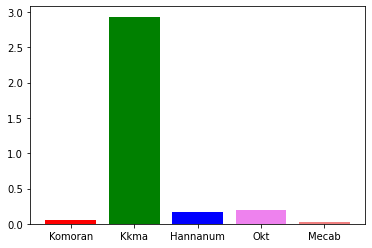

In [15]:
plt.bar([1,2,3,4,5],
        [sum(komoran), sum(kkma), sum(hannanum), sum(oktt), sum(mecab)],
        color = ['r','g','b','violet','lightcoral'])
plt.xticks([1,2,3,4,5], ['Komoran','Kkma','Hannanum','Okt','Mecab'])
plt.show()

okt.morphs : 형태소 단위로 나눔   
okt.normalize : 문장을 정규화 해줌. ㅋㅋㅋㅋㅋㅋㅋ -> ㅋㅋㅋ   
okt.nouns : 명사만 추출해줌   
okt.phrases : 어구를 추출해줌   
okt.pos : (형태소, 품사)를 추출해줌

In [17]:
ex2 = '데싸랩이 진짜 좋은 것 같앜ㅋㅋㅋㅋㅋㅋㅋㅋ!'

In [18]:
okt.normalize(ex2)

'데싸랩이 진짜 좋은 것 같아ㅋㅋㅋ!'

In [ ]:
print('Okt :', okt.pos(ex2))
print('Okt :', okt.pos(ex2, stem = True))
print('Okt :', okt.pos(ex2, norm = True))
print('Okt :', okt.pos(ex2, stem  = True, norm = True))

Okt : [('데이터', 'Noun'), ('싸이언스', 'Noun'), ('랩', 'Noun'), ('이', 'Josa'), ('진짜', 'Noun'), ('좋은', 'Adjective'), ('것', 'Noun'), ('같앜', 'Noun'), ('ㅋㅋㅋㅋㅋㅋㅋㅋ', 'KoreanParticle'), ('!', 'Punctuation')]
Okt : [('데이터', 'Noun'), ('싸이언스', 'Noun'), ('랩', 'Noun'), ('이', 'Josa'), ('진짜', 'Noun'), ('좋다', 'Adjective'), ('것', 'Noun'), ('같앜', 'Noun'), ('ㅋㅋㅋㅋㅋㅋㅋㅋ', 'KoreanParticle'), ('!', 'Punctuation')]
Okt : [('데이터', 'Noun'), ('싸이언스', 'Noun'), ('랩', 'Noun'), ('이', 'Josa'), ('진짜', 'Noun'), ('좋은', 'Adjective'), ('것', 'Noun'), ('같아', 'Adjective'), ('ㅋㅋㅋ', 'KoreanParticle'), ('!', 'Punctuation')]
Okt : [('데이터', 'Noun'), ('싸이언스', 'Noun'), ('랩', 'Noun'), ('이', 'Josa'), ('진짜', 'Noun'), ('좋다', 'Adjective'), ('것', 'Noun'), ('같다', 'Adjective'), ('ㅋㅋㅋ', 'KoreanParticle'), ('!', 'Punctuation')]


In [19]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('kykim/bert-kor-base')

In [20]:
tokenizer.tokenize(ex1)

['데이터',
 '사이',
 '##언스',
 '랩',
 '##은',
 '텍스트',
 '마이',
 '##닝',
 '##에',
 '대해서도',
 '공부할',
 '수',
 '있는',
 '좋은',
 '학',
 '##회',
 '##입니다',
 '.']

Okt :		 [('데이터', 'Noun'), ('사이언스', 'Noun'), ('랩', 'Noun'), ('은', 'Josa'), ('텍스트', 'Noun'), ('마', 'Noun'), ('이닝', 'Noun'), ('에', 'Josa'), ('대해', 'Noun'), ('서도', 'Noun'), ('공부', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있는', 'Adjective'), ('좋은', 'Adjective'), ('학회', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
Huggingface :	 ['데이터', '사이', '##언스', '랩', '##은', '텍스트', '마이', '##닝', '##에', '대해서도', '공부할', '수', '있는', '좋은', '학', '##회', '##입니다', '.']
Okt :		 [('데이터', 'Noun'), ('사이언스', 'Noun'), ('랩', 'Noun'), ('은', 'Josa'), ('텍스트', 'Noun'), ('마', 'Noun'), ('이닝', 'Noun'), ('에', 'Josa'), ('대해', 'Noun'), ('서도', 'Noun'), ('공부', 'Noun'), ('할', 'Verb'), ('수', 'Noun'), ('있는', 'Adjective'), ('좋은', 'Adjective'), ('학회', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
Huggingface :	 ['데이터', '사이', '##언스', '랩', '##은', '텍스트', '마이', '##닝', '##에', '대해서도', '공부할', '수', '있는', '좋은', '학', '##회', '##입니다', '.']
Okt :		 [('데이터', 'Noun'), ('사이언스', 'Noun'), ('랩', 'Noun'), ('은', 'Josa'), ('텍스트', 'Noun'), ('마', '

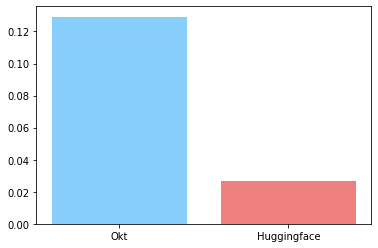

In [30]:
oktt = []
hf = []
for i in range(10):
    start = time.time()
    print('Okt :\t\t', okt.pos(ex1))
    oktt.append(time.time() - start)

    start = time.time()
    print('Huggingface :\t', tokenizer.tokenize(ex1))
    hf.append(time.time() - start)

plt.bar([1,2],
        [sum(oktt), sum(hf)],
        color = ['lightskyblue','lightcoral'])
plt.xticks([1,2], ['Okt','Huggingface'])
plt.show()

# Word Embedding

In [31]:
import gensim

In [32]:
model = gensim.models.Word2Vec.load('ko.bin')

In [33]:
print('Pretrained model의 단어 수(V) :', len(model.wv.vocab))
print('Pretrained model의 embedding vector의 size(N) :', len(model.wv['강아지']))

Pretrained model의 단어 수(V) : 30185
Pretrained model의 embedding vector의 size(N) : 200


In [ ]:
model.wv.vocab.keys()

dict_keys(['관위', '정어리', '유식론', '장로회', '춘추관', '도입부', '민병', '어렵', '매니저', '청담', '광주시', '고민', '어로', '어록', '폴라리스', '십만', '관음', '효과적', '관의', '당뇨병', '영중추', '듣', '민법', '마두라', '중국계', '여덟째', 'ㄴ단', 'ㄴ다', '테스트', '어찌하', '정안국', '엎드리', '싱가포르', '벡터', '관자', '관작', '팽대부', '테이블', '분석학', '유장', '렙톤', '어뢰', '다다르', '제공자', '히트', '멸망', '암기', '마르텔', '뻔', '윈도', '민방', '훤', '분기점', '결탁', '완결', '생매장', '워털루', '청도', '관영', '원자핵', '놋', '국정원장', '청동', '표면적', '저전력', '일치', '몽', '천동설', '어류', '마르타', '깊', '잘생기', '중재자', '관왕', '보퍼트', '현내면', '유임', '어른', '아와지', '머지', '수용자', '여진족', '마르탱', '피오르드', '사법권', '유재', '잠수함', '돌연', '성화', '펌', '여쭈', '처치', '간균', '섬광', '일컫', 'ㄴ대', '어림', '안토니', '관용', '어리', '암꽃', '청대', '앨런', '말', '관원', '게라', '다음달', '전염성', '마르크', 'ㄴ데', '영부인', '아마미', '소피스트', '스탠드', '폐회', '폐해', '베누스', '폐합', '설립자', '럭키', '다다미', '폐하', '서해안', '식초', '스크린', '잉크', '여주', '파나마', '이화학', '여종', '관아', '관악', '맺었으', '멸문', '지침서', '싫', '휘말리', '무선', '송정동', '은은', '수준의', '잉태', '로시니', '윙', '은의', '어명', '면상', '특허권', '민비', '섬기', '비상시', '비상식', '폐허', '원시림', 

In [39]:
model.wv.similar_by_word('강아지', topn = 50)

[('고양이', 0.7290452718734741),
 ('거위', 0.7185635566711426),
 ('토끼', 0.7056223154067993),
 ('멧돼지', 0.6950401067733765),
 ('엄마', 0.6934334635734558),
 ('난쟁이', 0.6806551218032837),
 ('한마리', 0.6770296096801758),
 ('아가씨', 0.6750352382659912),
 ('아빠', 0.6729634404182434),
 ('목걸이', 0.6512460708618164),
 ('까마귀', 0.6500682830810547),
 ('아주머니', 0.6432187557220459),
 ('독사', 0.6389124393463135),
 ('고슴도치', 0.6313384771347046),
 ('거북이', 0.6252505779266357),
 ('돼지', 0.6222692131996155),
 ('앵무새', 0.6218831539154053),
 ('개구리', 0.6218565702438354),
 ('당나귀', 0.6206705570220947),
 ('송아지', 0.6165446043014526),
 ('구미호', 0.615827202796936),
 ('메두사', 0.6134721040725708),
 ('사냥개', 0.6131488084793091),
 ('악어', 0.6128274202346802),
 ('뱀파이어', 0.6126487255096436),
 ('맹수', 0.609540581703186),
 ('갈기', 0.6087672114372253),
 ('아저씨', 0.6054108142852783),
 ('바구니', 0.6049458980560303),
 ('샴푸', 0.6020784974098206),
 ('잠자리', 0.6012549996376038),
 ('요괴', 0.6010540127754211),
 ('기러기', 0.6004207134246826),
 ('아기', 0.6002471446

In [ ]:
# pretrained model을 가져올때 encoding error를 피하기 위해 binary = False로 다시 저장
# model.wv.save_word2vec_format('ko.bin.gz', binary = False)

In [41]:
def CustomTokenizer(corpus, stop = ['Josa','Suffix','Punctuation', 'Foreign', 'Number']):
    tokenized = []
    for i, j in okt.pos(corpus, stem = True, norm = True):
        if j in stop:
            continue
        tokenized.append(i)
    return tokenized      

In [42]:
train_set = []
ex1 = '데이터 사이언스 랩은 텍스트 마이닝에 대해서도 공부할 수 있는 좋은 학회입니다.'
ex2 = '데이터 싸이언스 랩이 진짜 좋은 것 같앜ㅋㅋㅋㅋㅋㅋㅋㅋ!'

In [43]:
train_set.append(CustomTokenizer(ex1))
train_set.append(CustomTokenizer(ex2))

In [44]:
train_set

[['데이터',
  '사이언스',
  '랩',
  '텍스트',
  '마',
  '이닝',
  '대해',
  '서도',
  '공부',
  '하다',
  '수',
  '있다',
  '좋다',
  '학회',
  '이다'],
 ['데이터', '싸이언스', '랩', '진짜', '좋다', '것', '같다', 'ㅋㅋㅋ']]

hyperparameter

size : embedding vector의 차원 (default = 100)   
min_count : n번 이하로 나온 단어는 무시 (default =  5)  
window : 주변 몇 개의 단어로 학습을 진행할 것인지 (default = 5)   
sg = 0이면 CBoW, 1이면 Skip Gram (default = 1)   
hs = 0이면 Hierarchical Softmax 사용 x, 1이면 사용 (default = 1)   
negative : negative sampling 의 noise words 개수 (default = 5)   
alpha : 초기 learning rate (default = 0.025)   
min_alpha : 최소 learning_rate   
seed : random seed   

In [45]:
#새로운 모델 생성 size(embedding vector)는 pretrained model과 같아야 함.
model2 = gensim.models.Word2Vec(size = model.wv.vector_size, min_count = 0)

#새로운 train_set의 vocabulary 추가
model2.build_vocab(train_set)
total_examples = model2.corpus_count
print('현재 vocabulary size (V) :',len(model2.wv.vocab))

현재 vocabulary size(V) : 20


In [46]:
#pretrained model의 학습되어 있는 vocabulary list 불러오기
model2.build_vocab([list(model.wv.vocab.keys())], update = True)
print('현재 vocabulary size(V) :', len(model2.wv.vocab))

현재 vocabulary size(V) : 30189


In [47]:
model2.wv.vocab.keys()

dict_keys(['데이터', '사이언스', '랩', '텍스트', '마', '이닝', '대해', '서도', '공부', '하다', '수', '있다', '좋다', '학회', '이다', '싸이언스', '진짜', '것', '같다', 'ㅋㅋㅋ', '관위', '정어리', '유식론', '장로회', '춘추관', '도입부', '민병', '어렵', '매니저', '청담', '광주시', '고민', '어로', '어록', '폴라리스', '십만', '관음', '효과적', '관의', '당뇨병', '영중추', '듣', '민법', '마두라', '중국계', '여덟째', 'ㄴ단', 'ㄴ다', '테스트', '어찌하', '정안국', '엎드리', '싱가포르', '벡터', '관자', '관작', '팽대부', '테이블', '분석학', '유장', '렙톤', '어뢰', '다다르', '제공자', '히트', '멸망', '암기', '마르텔', '뻔', '윈도', '민방', '훤', '분기점', '결탁', '완결', '생매장', '워털루', '청도', '관영', '원자핵', '놋', '국정원장', '청동', '표면적', '저전력', '일치', '몽', '천동설', '어류', '마르타', '깊', '잘생기', '중재자', '관왕', '보퍼트', '현내면', '유임', '어른', '아와지', '머지', '수용자', '여진족', '마르탱', '피오르드', '사법권', '유재', '잠수함', '돌연', '성화', '펌', '여쭈', '처치', '간균', '섬광', '일컫', 'ㄴ대', '어림', '안토니', '관용', '어리', '암꽃', '청대', '앨런', '말', '관원', '게라', '다음달', '전염성', '마르크', 'ㄴ데', '영부인', '아마미', '소피스트', '스탠드', '폐회', '폐해', '베누스', '폐합', '설립자', '럭키', '다다미', '폐하', '서해안', '식초', '스크린', '잉크', '여주', '파나마', '이화학', '여종', '관아', '관악', '맺었으', '멸문', '지침서

In [48]:
model2.wv.most_similar('나비')

[('커티스', 0.26691633462905884),
 ('시신', 0.2642991542816162),
 ('년형', 0.26133203506469727),
 ('어질', 0.2605515718460083),
 ('기소', 0.25898492336273193),
 ('삼척군', 0.2540667951107025),
 ('마우스', 0.25073474645614624),
 ('케이', 0.2502039074897766),
 ('농서', 0.24832764267921448),
 ('항일', 0.2462770938873291)]

In [49]:
#embedding vector 까지 불러오기. lockf = 0.0 이면 불러온 벡터에 대해서는 재학습이 불가함. 1.0이면 재학습 가능.
model2.intersect_word2vec_format('ko.bin.gz', binary = False, lockf = 1.0)

In [50]:
model2.train(train_set, total_examples = len(train_set), epochs = 3)

(55, 69)

In [51]:
model2.wv.most_similar('나비')

[('호랑', 0.7221653461456299),
 ('거미', 0.7095274925231934),
 ('족제비', 0.6975173950195312),
 ('잠자리', 0.6971200108528137),
 ('네발', 0.6922956109046936),
 ('개구리', 0.6853677034378052),
 ('지렁이', 0.6686853170394897),
 ('캥거루', 0.6567738056182861),
 ('고슴도치', 0.6552319526672363),
 ('해파리', 0.6538781523704529)]

In [52]:
model2.wv.most_similar('싸이언스')

[('전차선', 0.25761786103248596),
 ('삭제', 0.2517295181751251),
 ('묶음', 0.2453635334968567),
 ('체인', 0.24262696504592896),
 ('복호', 0.23637811839580536),
 ('달리하', 0.2361159324645996),
 ('보강', 0.2360796481370926),
 ('고치', 0.2360796332359314),
 ('점유', 0.23074577748775482),
 ('상용', 0.22814086079597473)]

# Visualization

In [53]:
import plotly
import plotly.graph_objs as go
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [54]:
X, t = make_swiss_roll(n_samples = 1000, noise = 0)

In [55]:
print(X.shape)
print(t.shape)

(1000, 3)
(1000,)


In [56]:
print(t[:10])

[10.01474649 11.30242555 13.25897374  5.35690912 12.91063506  7.01822997
  6.65180073  8.3361707   7.17246508  7.94761225]


In [57]:
color = (t - t.min()) / (t.max() - t.min())

In [58]:
data = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text = ['point #{}'.format(i) for i in range(X.shape[0])],
    mode='markers',
    marker=dict(
        size=3,
        color=color,
        colorscale='Jet',
        line=dict(
            width=0.0
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig = go.Figure(data=[data], layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning: plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin

  DeprecationWarning,


In [59]:
pca = PCA(random_state = 0).fit_transform(X)[:,:2]
print(pca.shape)
pca

(1000, 2)


array([[ -9.88877231,  -6.07638587],
       [-10.04499661,   5.31226442],
       [ 11.35461109,   4.0600844 ],
       ...,
       [ 12.96563635,  -2.70060538],
       [ 11.82893108,  -4.31734858],
       [ -8.11759022,   7.79212597]])

In [60]:
data = go.Scatter(
    x=pca[:,0],
    y=pca[:,1],
    text = ['point #{}'.format(i) for i in range(X.shape[0])],
    mode='markers',
    marker=dict(
        size=5,
        color=color,
        colorscale='Jet',
        line=dict(
            width=0.0
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig = go.Figure(data=[data], layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [65]:
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 50, learning_rate = 0.05, init = 'random', n_iter = 1000).fit_transform(X)[:, :2]
print(tsne.shape)
tsne

(1000, 2)


array([[-4.2378607,  0.4559479],
       [-2.3753123,  4.9845743],
       [ 4.436779 , -1.8608599],
       ...,
       [ 3.442256 , -3.4873407],
       [ 4.790262 , -3.9510431],
       [-2.1191292,  3.096631 ]], dtype=float32)

In [66]:
data = go.Scatter(
    x=tsne[:,0],
    y=tsne[:,1],
    text = ['point #{}'.format(i) for i in range(X.shape[0])],
    mode='markers',
    marker=dict(
        size=5,
        color=color,
        colorscale='Jet',
        line=dict(
            width=0.0
        ),
        opacity=0.8
    )
)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=go.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig = go.Figure(data=[data], layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [67]:
vocab = []
vector = []
for i in tqdm(model.wv.vocab.keys()):
    vocab.append(i)
    vector.append(model.wv[i])

  0%|          | 0/30185 [00:00<?, ?it/s]

In [68]:
three_dim = PCA(random_state = 0).fit_transform(vector)[:,:3]

In [69]:
three_dim.shape

(30185, 3)

In [70]:
data = go.Scatter3d(
    x = three_dim[:, 0],
    y = three_dim[:, 1],
    z = three_dim[:, 2],
    text = vocab,
    marker = dict(
        size = 3,
        colorscale = 'Jet',
        opacity = 0.8
    )
)

layout = go.Layout(
    autosize = False,
    width = 1000,
    height = 1000,
    margin = go.Margin(
        l = 50,
        r = 50,
        b = 100,
        t = 100,
        pad = 4
    )
)

fig = go.Figure(data = [data], layout = layout)
fig.show()

Output hidden; open in https://colab.research.google.com to view.